In [3]:
# open the generated synthetic data file and read it as a python dictionary called data

import json

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)


In [4]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

/Users/jonnasosauranga/Desktop/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/jonnasosauranga/Desktop/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/jonnasosauranga/Desktop/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/jonnasosauranga/Desktop/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/jonnasosauranga/D

In [5]:
import numpy as np
import drift_algorithms as algo
from tqdm import tqdm

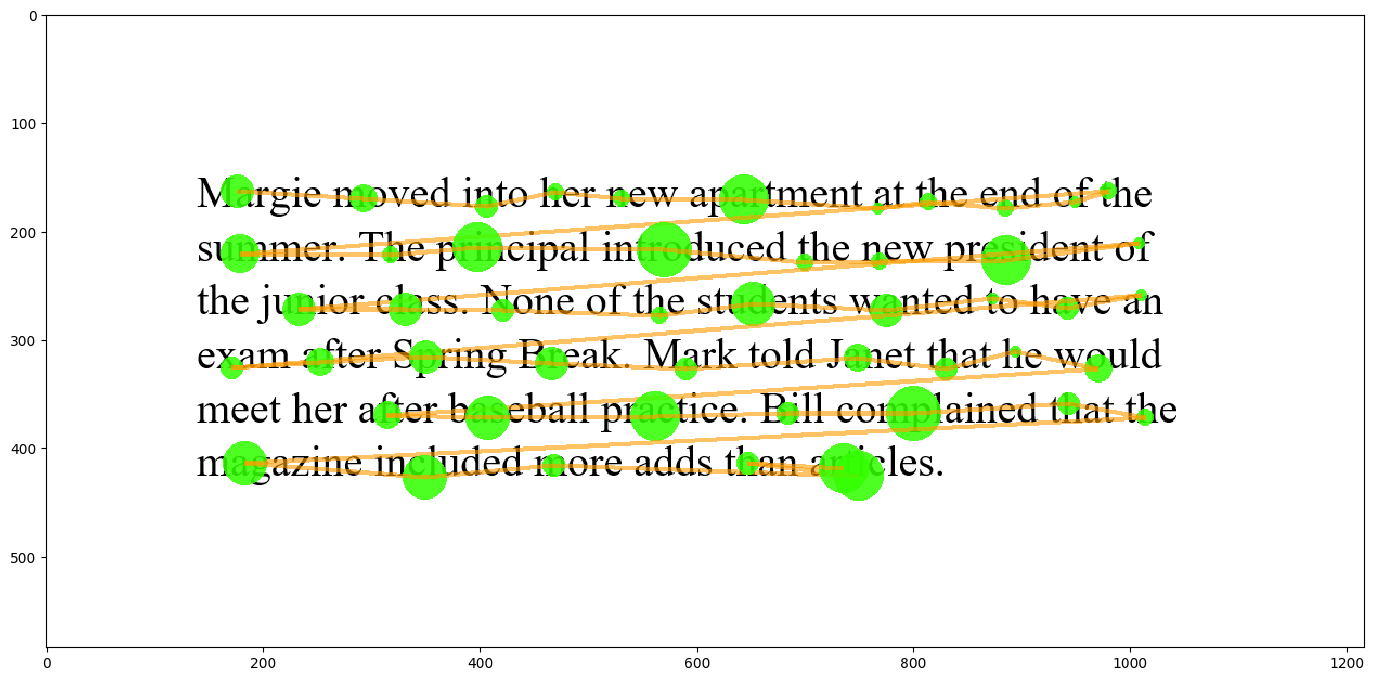

In [6]:
# draw original correct fixations

correction.draw_fixation('synthetic_text.png', data['robot1'].copy())

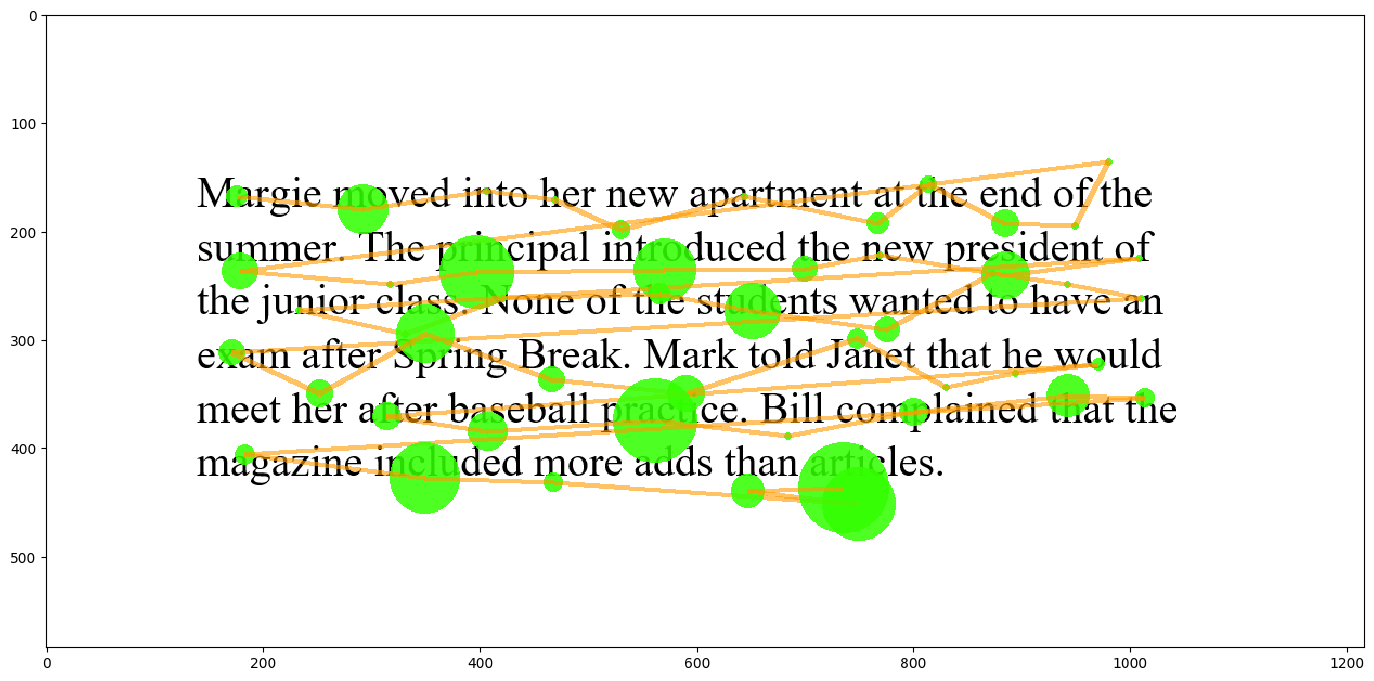

In [7]:
# generate noise over the correct trial

error_test = correction.error_noise(1, 30, 1, data['robot1'].copy())

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

1.0


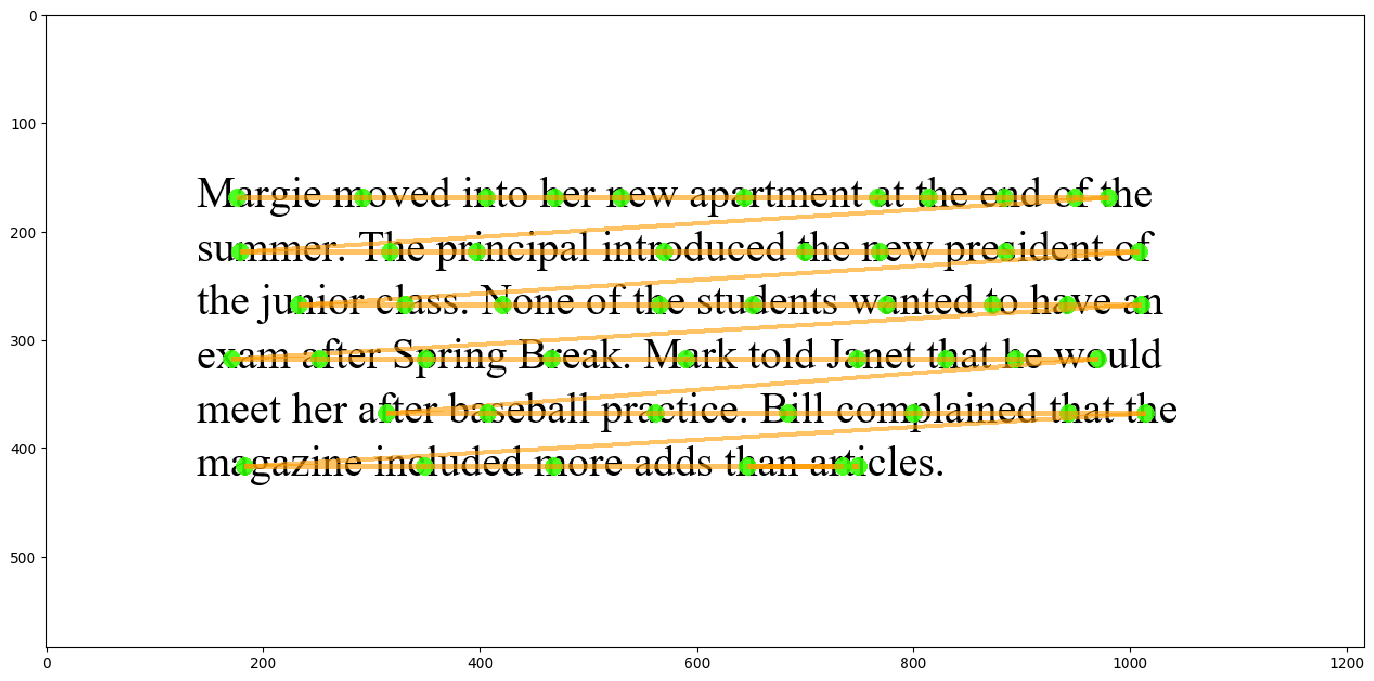

In [8]:
# find the center of each word, we need this for warp algorithm
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

# warp correction
np_array = np.array(error_test.copy(), dtype=int)
durations = np.delete(np_array, 0, 1)
durations = np.delete(durations, 0, 1)
np_array = np.delete(np_array, 2, 1)

# run warp
warp_correction = algo.warp(np_array, word_centers)

# this is a cool function that checks the quality of the correction
percentage, match_list = correction.correction_quality(aoi, data['robot1'].copy(), warp_correction)
print(percentage)

# this is a cool function that draws the correction in red if the algorithm made a mistake
correction.draw_correction('synthetic_text.png', warp_correction, match_list)

This concludes the example I wanted to show you of running an error generator, then correcting the data, then seeing how well the correction algorithm did.  You will need to repeat the same concept for a bunch of algorithms in the next section.

In [9]:
import statistics
import my_refactor as r
import matplotlib.pyplot as plt

def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

# Comparing algorithms with Noise error:

In this example, I show you one type of erro "Noise" you will implement all 5 types and add skipping to your assessment.  Also, the code below runs only 4 algorithms, you will add the remaining 6 algorithms to this assessment for each type of error. 

In [10]:
attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
chain_results = [[],[],[],[],[],[],[],[],[],[],[]]
regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
split_results = [[],[],[],[],[],[],[],[],[],[],[]]
stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]

word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for robot_index in tqdm(range(100)):#1 is for one robot
    print('robot ' + str(robot_index))
    
    for error_probability in range(0, 11):
        # generate error
        error_test = correction.error_noise(error_probability/10, 30, error_probability/10, data['robot' + str(robot_index)].copy())

        # attach correction
        percentage, corrections, match_list = r.attach_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        attach_results[error_probability].append(percentage)

        # chain correction
        percentage, corrections, match_list = r.chain_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        chain_results[error_probability].append(percentage)
        
        # regress correction
        percentage, corrections, match_list = r.regress_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        regress_results[error_probability].append(percentage)
        
        # warp correction
        percentage, warp_correction, match_list = r.warp_correction(error_test, word_centers, aoi, data['robot' + str(robot_index)])
        warp_results[error_probability].append(percentage)

        # cluster correction
        percentage, corrections, match_list = r.cluster_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        cluster_results[error_probability].append(percentage)

        # compare correction
        percentage, corrections, match_list = r.compare_correction(error_test, line_ys, word_centers, aoi, data['robot' + str(robot_index)])
        compare_results[error_probability].append(percentage)

        # merge correction
        percentage, corrections, match_list = r.merge_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        merge_results[error_probability].append(percentage)

        # segment correction
        percentage, corrections, match_list = r.segment_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        segment_results[error_probability].append(percentage)

        # split correction
        percentage, corrections, match_list = r.split_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        split_results[error_probability].append(percentage)

        # stretch correction
        percentage, corrections, match_list = r.stretch_correction(error_test, line_ys, aoi, data['robot' + str(robot_index)])
        stretch_results[error_probability].append(percentage)

        '''if percentage < 1:
            correction.draw_correction('synthetic_text.png', corrections, match_list)
            print("robot:", robot_index, "    error probability:", error_probability)'''


  0%|          | 0/100 [00:00<?, ?it/s]

robot 0


  1%|          | 1/100 [00:13<22:54, 13.88s/it]

robot 1


  2%|▏         | 2/100 [00:30<24:51, 15.22s/it]

robot 2


  3%|▎         | 3/100 [00:51<28:55, 17.89s/it]

robot 3


  4%|▍         | 4/100 [01:05<26:07, 16.33s/it]

robot 4


  5%|▌         | 5/100 [01:17<23:44, 15.00s/it]

robot 5


  6%|▌         | 6/100 [01:31<22:58, 14.66s/it]

robot 6


  7%|▋         | 7/100 [01:45<22:12, 14.32s/it]

robot 7


  8%|▊         | 8/100 [02:04<24:10, 15.77s/it]

robot 8


  9%|▉         | 9/100 [02:17<22:53, 15.09s/it]

robot 9


 10%|█         | 10/100 [02:36<24:10, 16.11s/it]

robot 10


 11%|█         | 11/100 [02:52<24:12, 16.32s/it]

robot 11


 12%|█▏        | 12/100 [03:06<22:29, 15.34s/it]

robot 12


 13%|█▎        | 13/100 [03:25<23:59, 16.55s/it]

robot 13


 14%|█▍        | 14/100 [03:37<21:38, 15.10s/it]

robot 14


 15%|█▌        | 15/100 [03:50<20:44, 14.64s/it]

robot 15


 16%|█▌        | 16/100 [04:03<19:37, 14.01s/it]

robot 16


 17%|█▋        | 17/100 [04:18<19:54, 14.39s/it]

robot 17


 18%|█▊        | 18/100 [04:31<19:06, 13.99s/it]

robot 18


 19%|█▉        | 19/100 [04:46<19:25, 14.39s/it]

robot 19


 20%|██        | 20/100 [05:01<19:11, 14.39s/it]

robot 20


 21%|██        | 21/100 [05:14<18:37, 14.14s/it]

robot 21


 22%|██▏       | 22/100 [05:30<18:46, 14.44s/it]

robot 22


 23%|██▎       | 23/100 [05:42<17:47, 13.87s/it]

robot 23


 24%|██▍       | 24/100 [05:57<17:56, 14.17s/it]

robot 24


 25%|██▌       | 25/100 [06:10<17:11, 13.75s/it]

robot 25


 26%|██▌       | 26/100 [06:23<16:57, 13.75s/it]

robot 26


 27%|██▋       | 27/100 [06:37<16:31, 13.59s/it]

robot 27


 28%|██▊       | 28/100 [06:48<15:28, 12.90s/it]

robot 28


 29%|██▉       | 29/100 [07:05<16:44, 14.15s/it]

robot 29


 30%|███       | 30/100 [07:17<15:39, 13.42s/it]

robot 30


 31%|███       | 31/100 [07:32<16:03, 13.97s/it]

robot 31


 32%|███▏      | 32/100 [07:55<18:44, 16.54s/it]

robot 32


 33%|███▎      | 33/100 [08:06<16:39, 14.92s/it]

robot 33


 34%|███▍      | 34/100 [08:21<16:28, 14.98s/it]

robot 34


 35%|███▌      | 35/100 [08:34<15:34, 14.38s/it]

robot 35


 36%|███▌      | 36/100 [08:49<15:34, 14.59s/it]

robot 36


 37%|███▋      | 37/100 [09:04<15:27, 14.73s/it]

robot 37


 38%|███▊      | 38/100 [09:19<15:18, 14.82s/it]

robot 38


 39%|███▉      | 39/100 [09:33<14:48, 14.56s/it]

robot 39


 40%|████      | 40/100 [09:45<13:49, 13.82s/it]

robot 40


 41%|████      | 41/100 [10:04<15:10, 15.44s/it]

robot 41


 42%|████▏     | 42/100 [10:20<15:09, 15.68s/it]

robot 42


 43%|████▎     | 43/100 [10:40<15:53, 16.72s/it]

robot 43


 44%|████▍     | 44/100 [10:54<14:56, 16.01s/it]

robot 44


 45%|████▌     | 45/100 [11:09<14:23, 15.70s/it]

robot 45


 46%|████▌     | 46/100 [11:22<13:18, 14.80s/it]

robot 46


 47%|████▋     | 47/100 [11:33<12:14, 13.86s/it]

robot 47


 48%|████▊     | 48/100 [11:43<11:02, 12.73s/it]

robot 48


 49%|████▉     | 49/100 [11:58<11:20, 13.35s/it]

robot 49


 50%|█████     | 50/100 [12:13<11:26, 13.73s/it]

robot 50


 51%|█████     | 51/100 [12:24<10:31, 12.88s/it]

robot 51


 52%|█████▏    | 52/100 [12:37<10:26, 13.06s/it]

robot 52


 53%|█████▎    | 53/100 [12:51<10:29, 13.40s/it]

robot 53


 54%|█████▍    | 54/100 [13:04<09:59, 13.03s/it]

robot 54


 55%|█████▌    | 55/100 [13:21<10:46, 14.37s/it]

robot 55


 56%|█████▌    | 56/100 [13:35<10:32, 14.37s/it]

robot 56


 57%|█████▋    | 57/100 [13:49<10:11, 14.23s/it]

robot 57


 58%|█████▊    | 58/100 [14:04<10:02, 14.35s/it]

robot 58


 59%|█████▉    | 59/100 [14:14<08:58, 13.13s/it]

robot 59


 60%|██████    | 60/100 [14:24<08:10, 12.26s/it]

robot 60


 61%|██████    | 61/100 [14:40<08:40, 13.33s/it]

robot 61


 62%|██████▏   | 62/100 [14:55<08:46, 13.84s/it]

robot 62


 63%|██████▎   | 63/100 [15:10<08:41, 14.09s/it]

robot 63


 64%|██████▍   | 64/100 [15:21<07:55, 13.21s/it]

robot 64


 65%|██████▌   | 65/100 [15:35<07:45, 13.29s/it]

robot 65


 66%|██████▌   | 66/100 [15:47<07:18, 12.90s/it]

robot 66


 67%|██████▋   | 67/100 [16:02<07:34, 13.77s/it]

robot 67


 68%|██████▊   | 68/100 [16:16<07:22, 13.82s/it]

robot 68


 69%|██████▉   | 69/100 [16:28<06:51, 13.28s/it]

robot 69


 70%|███████   | 70/100 [16:42<06:40, 13.34s/it]

robot 70


 71%|███████   | 71/100 [16:56<06:31, 13.49s/it]

robot 71


 72%|███████▏  | 72/100 [17:09<06:14, 13.39s/it]

robot 72


 73%|███████▎  | 73/100 [17:20<05:40, 12.62s/it]

robot 73


 74%|███████▍  | 74/100 [17:31<05:16, 12.19s/it]

robot 74


 75%|███████▌  | 75/100 [17:47<05:34, 13.38s/it]

robot 75


 76%|███████▌  | 76/100 [17:58<05:02, 12.60s/it]

robot 76


 77%|███████▋  | 77/100 [18:10<04:49, 12.60s/it]

robot 77


 78%|███████▊  | 78/100 [18:25<04:51, 13.27s/it]

robot 78


 79%|███████▉  | 79/100 [18:39<04:44, 13.56s/it]

robot 79


 80%|████████  | 80/100 [18:59<05:08, 15.45s/it]

robot 80


 81%|████████  | 81/100 [19:18<05:14, 16.57s/it]

robot 81


 82%|████████▏ | 82/100 [19:33<04:45, 15.85s/it]

robot 82


 83%|████████▎ | 83/100 [19:45<04:12, 14.83s/it]

robot 83


 84%|████████▍ | 84/100 [19:58<03:49, 14.33s/it]

robot 84


 85%|████████▌ | 85/100 [20:09<03:17, 13.17s/it]

robot 85


 86%|████████▌ | 86/100 [20:21<03:00, 12.92s/it]

robot 86


 87%|████████▋ | 87/100 [20:39<03:05, 14.29s/it]

robot 87


 88%|████████▊ | 88/100 [20:51<02:46, 13.85s/it]

robot 88


 89%|████████▉ | 89/100 [21:03<02:23, 13.06s/it]

robot 89


 90%|█████████ | 90/100 [21:14<02:06, 12.64s/it]

robot 90


 91%|█████████ | 91/100 [21:26<01:52, 12.52s/it]

robot 91


 92%|█████████▏| 92/100 [21:42<01:47, 13.39s/it]

robot 92


 93%|█████████▎| 93/100 [21:55<01:32, 13.28s/it]

robot 93


 94%|█████████▍| 94/100 [22:08<01:20, 13.36s/it]

robot 94


 95%|█████████▌| 95/100 [22:22<01:07, 13.49s/it]

robot 95


 96%|█████████▌| 96/100 [22:38<00:57, 14.30s/it]

robot 96


 97%|█████████▋| 97/100 [22:54<00:44, 14.72s/it]

robot 97


 98%|█████████▊| 98/100 [23:06<00:27, 13.80s/it]

robot 98


 99%|█████████▉| 99/100 [23:24<00:14, 14.97s/it]

robot 99


100%|██████████| 100/100 [23:36<00:00, 14.16s/it]


In [11]:
import statistics

def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [12]:
mean_attach_results = mean_error_group(attach_results)
mean_chain_results = mean_error_group(chain_results)
mean_regress_results = mean_error_group(regress_results)
mean_warp_results = mean_error_group(warp_results)
mean_cluster_results = mean_error_group(cluster_results)
mean_compare_results = mean_error_group(compare_results)
mean_merge_results = mean_error_group(merge_results)
mean_segments_results = mean_error_group(segment_results)
mean_split_results = mean_error_group(split_results)
mean_stretch_results = mean_error_group(stretch_results)

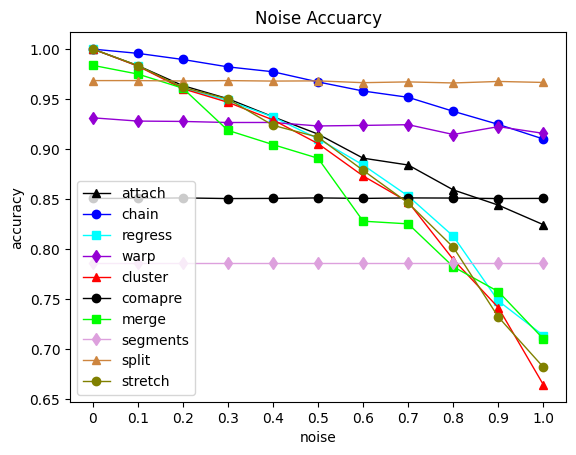

In [13]:
plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
plt.plot(mean_chain_results, color='Blue', linewidth=1, marker='o')
plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
plt.plot(mean_warp_results, color='DarkViolet', linewidth=1, marker='d')

plt.plot(mean_cluster_results, color='Red', linewidth=1, marker='^')
plt.plot(mean_compare_results, color='Black', linewidth=1, marker='o')
plt.plot(mean_merge_results, color='lime', linewidth=1, marker='s')
plt.plot(mean_segments_results, color='plum', linewidth=1, marker='d')
plt.plot(mean_split_results, color='peru', linewidth=1, marker='^')
plt.plot(mean_stretch_results, color='olive', linewidth=1, marker='o')

plt.legend(['attach', 'chain', 'regress', 'warp', 'cluster','comapre','merge','segments','split','stretch'])
plt.ylabel('accuracy')
plt.xlabel('noise')

plt.title('Noise Accuarcy')
x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(range(0, 11), x_ticks_labels)
#plt.savefig("noise_comparison.png")
plt.show()

In [14]:
print("mean attach:", statistics.mean(mean_attach_results))
print("mean chain:", statistics.mean(mean_chain_results))
print("mean regress:", statistics.mean(mean_regress_results))
print("mean warp:", statistics.mean(mean_warp_results))
print("mean cluster:", statistics.mean(mean_cluster_results))
print("mean compare:", statistics.mean(mean_compare_results))
print("mean merge:", statistics.mean(mean_merge_results))
print("mean segments:", statistics.mean(mean_segments_results))
print("mean split:", statistics.mean(mean_split_results))
print("mean stretch:", statistics.mean(mean_stretch_results))


mean attach: 0.9133262151773924
mean chain: 0.9630020255183026
mean regress: 0.8860540435030484
mean warp: 0.9239347096818045
mean cluster: 0.8763754623995264
mean compare: 0.8508270825504841
mean merge: 0.8669789099372301
mean segments: 0.7862233022273994
mean split: 0.9674911005326173
mean stretch: 0.8792281906124135
